In [1]:
using CSV, DataFramesMeta, CairoMakie, StatsBase

In [6]:
t = Float64[]
signal = "bb0nuM2_foil_bulk"
processMode = "sumE"

"sumE"

In [7]:
for f in readdir("informative_priors")
    if (occursin(signal, f) && occursin(processMode, f))
        d = CSV.File(joinpath("informative_priors", f)) |> DataFrame
        filter!(x -> x.thalf .> 0, d)
        append!(t, d.thalf)
    end
end

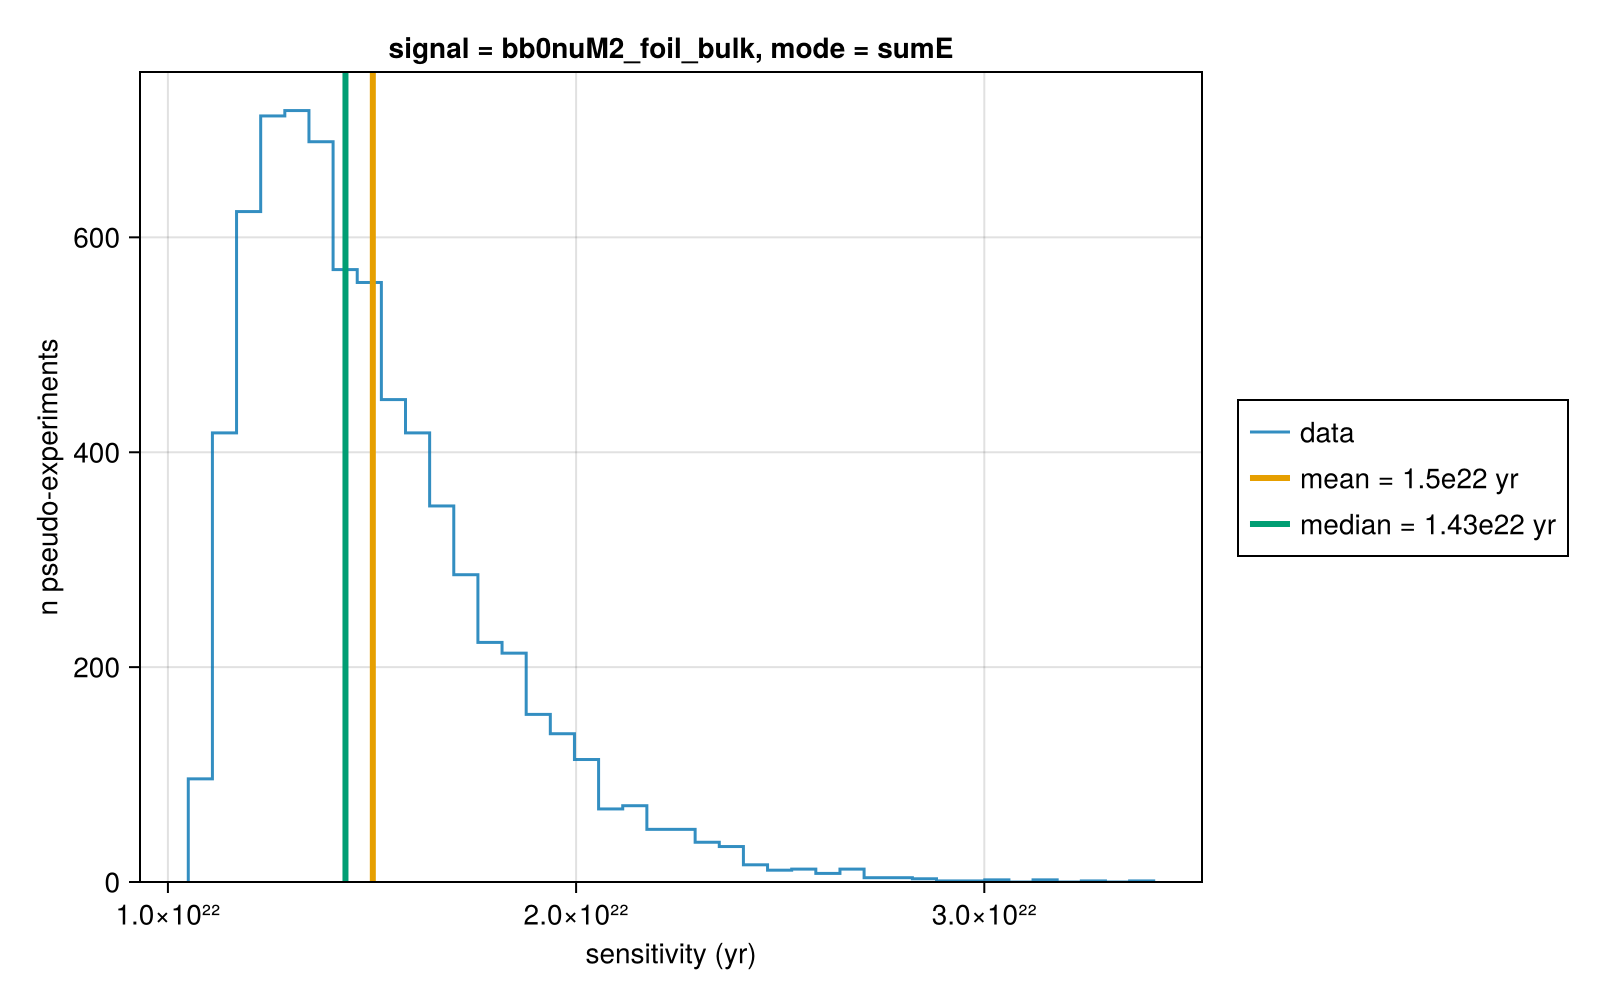

In [8]:
let
    f = Figure(size = (800, 500))
    a = Axis(
        f[1,1], xlabel = "sensitivity (yr)", 
        ylabel = ("n pseudo-experiments"), limits = (nothing, nothing, 0, nothing), 
        title = "signal = $signal, mode = $processMode"
    )
    p1 = stephist!(a,t, bins = 40, label = "data")
    p2 = vlines!(
        a, 
        [mean(t)], 
        color = Makie.wong_colors()[2],
        linewidth = 3
    )
    p3 = vlines!(
        a, 
        [median(t)], 
        color = Makie.wong_colors()[3],
        linewidth = 3
    )

    Legend(f[1,2], [p1, p2, p3], ["data", "mean = $(round(mean(t), sigdigits = 3)) yr", "median = $(round(median(t), sigdigits = 3)) yr"])
    save("result_$(signal)_$(processMode)_informative.png", f)
    f
end